In [2]:
# Test StatsBomb connection
from statsbombpy import sb
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Test 1: Get competitions
print("🔄 Testing StatsBomb connection...")
competitions = sb.competitions()
print(f"✅ Found {len(competitions)} competitions available")


🔄 Testing StatsBomb connection...
✅ Found 74 competitions available


In [4]:
# Test 2: Display first 10 competitions
print("\n📊 Available competitions (sample):")
display_cols = ['competition_name', 'season_name', 'competition_id', 'season_id']
print(competitions[display_cols].head(10))



📊 Available competitions (sample):
         competition_name season_name  competition_id  season_id
0           1. Bundesliga   2023/2024               9        281
1           1. Bundesliga   2015/2016               9         27
2  African Cup of Nations        2023            1267        107
3        Champions League   2018/2019              16          4
4        Champions League   2017/2018              16          1
5        Champions League   2016/2017              16          2
6        Champions League   2015/2016              16         27
7        Champions League   2014/2015              16         26
8        Champions League   2013/2014              16         25
9        Champions League   2012/2013              16         24


In [5]:
# Test 3: Check for Premier League data
pl_data = competitions[competitions['competition_name'] == 'Premier League']
print(f"\n⚽ Premier League seasons available: {len(pl_data)}")
if len(pl_data) > 0:
    print("Premier League seasons found:")
    print(pl_data[['season_name', 'competition_id', 'season_id']])


⚽ Premier League seasons available: 2
Premier League seasons found:
   season_name  competition_id  season_id
64   2015/2016               2         27
65   2003/2004               2         44


Load the competitions table and filter by Premier League 2015/16:

In [19]:
# List competitions
competitions = sb.competitions()
pl_2015 = competitions[(competitions['competition_name'] == 'Premier League') & 
                       (competitions['season_name'] == '2015/2016')]
print(pl_2015[['competition_id', 'season_id']])


    competition_id  season_id
64               2         27


Download all matches for the 2015/16 season:

In [11]:
competition_id = int(pl_2015['competition_id'].values[0])
season_id = int(pl_2015['season_id'].values[0])

matches = sb.matches(competition_id=competition_id, season_id=season_id)
print(f"Total matches: {len(matches)}")
display_columns = ['match_id', 'home_team', 'away_team', 'match_date']
print(matches[display_columns].head())


Total matches: 380
   match_id             home_team        away_team  match_date
0   3754058        Leicester City  AFC Bournemouth  2016-01-02
1   3754245  West Bromwich Albion       Sunderland  2015-10-17
2   3754136      Newcastle United      Aston Villa  2015-12-19
3   3754037               Everton  AFC Bournemouth  2016-04-30
4   3754039        Crystal Palace          Watford  2016-02-13


In [21]:
matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3754020,2015-08-17,21:00:00.000,England - Premier League,2015/2016,Liverpool,AFC Bournemouth,1,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Anfield,Craig Pawson,Brendan Rodgers,Eddie Howe,1.1.0,2,2
376,3754267,2015-08-15,16:00:00.000,England - Premier League,2015/2016,Watford,West Bromwich Albion,0,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Vicarage Road,Paul Tierney,Enrique Sánchez Flores,Tony Pulis,1.1.0,2,2
377,3754141,2015-08-09,14:30:00.000,England - Premier League,2015/2016,Arsenal,West Ham United,0,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Emirates Stadium,Martin Atkinson,Arsène Wenger,Slaven Bilić,1.1.0,2,2
378,3754128,2015-08-08,16:00:00.000,England - Premier League,2015/2016,AFC Bournemouth,Aston Villa,0,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Vitality Stadium,Mark Clattenburg,Eddie Howe,Tim Sherwood,1.1.0,2,2


In [22]:
example_match_id = matches.iloc[0]['match_id']
events = sb.events(match_id=example_match_id)
print(events.head())
print(events.columns)


  ball_receipt_outcome ball_recovery_recovery_failure carry_end_location  \
0                  NaN                            NaN                NaN   
1                  NaN                            NaN                NaN   
2                  NaN                            NaN                NaN   
3                  NaN                            NaN                NaN   
4                  NaN                            NaN                NaN   

  clearance_aerial_won clearance_body_part clearance_head clearance_left_foot  \
0                  NaN                 NaN            NaN                 NaN   
1                  NaN                 NaN            NaN                 NaN   
2                  NaN                 NaN            NaN                 NaN   
3                  NaN                 NaN            NaN                 NaN   
4                  NaN                 NaN            NaN                 NaN   

  clearance_right_foot counterpress dribble_nutmeg  ... 

Use the first match for analysis

In [25]:
events.to_csv('C:/Users/User/Downloads/xg-football-analysis/data/raw/events_example.csv', index=False)


In [30]:
shots = events[events['type'] == 'Shot']
print(shots[['minute', 'second', 'player', 'team', 'location', 'shot_outcome']].head())


      minute  second               player             team       location  \
3149       1      33     Junior Stanislas  AFC Bournemouth  [107.1, 26.6]   
3150       4      23          Joshua King  AFC Bournemouth  [113.7, 54.0]   
3151       9      20         Riyad Mahrez   Leicester City  [115.7, 50.5]   
3152      13      11          Joshua King  AFC Bournemouth  [113.9, 38.6]   
3153      25      47  José Leonardo Ulloa   Leicester City   [96.7, 47.2]   

     shot_outcome  
3149      Blocked  
3150      Blocked  
3151        Off T  
3152        Off T  
3153      Wayward  


In [31]:
shots['shot_outcome']

3149    Blocked
3150    Blocked
3151      Off T
3152      Off T
3153    Wayward
3154       Post
3155      Off T
3156      Off T
3157      Off T
3158    Wayward
3159      Saved
3160      Off T
3161      Saved
3162    Blocked
3163    Blocked
3164    Blocked
3165      Off T
3166      Saved
3167      Off T
3168      Off T
3169      Off T
3170    Blocked
3171      Off T
3172    Blocked
3173      Off T
3174    Blocked
3175      Off T
Name: shot_outcome, dtype: object

In [34]:
shots['goal'] = (shots['shot_outcome'] == 'Goal').astype(int)
shots['goal']

3149    0
3150    0
3151    0
3152    0
3153    0
3154    0
3155    0
3156    0
3157    0
3158    0
3159    0
3160    0
3161    0
3162    0
3163    0
3164    0
3165    0
3166    0
3167    0
3168    0
3169    0
3170    0
3171    0
3172    0
3173    0
3174    0
3175    0
Name: goal, dtype: int32

In [36]:
all_shots = []

for i, row in matches.iterrows():
    match_id = row['match_id']
    events = sb.events(match_id=match_id)
    shots = events[events['type'] == 'Shot'].copy()
    shots['goal'] = (shots['shot_outcome'] == 'Goal').astype(int)
    all_shots.append(shots)

shots_df = pd.concat(all_shots, ignore_index=True)


In [39]:
print(shots_df.shape)

(9908, 119)


In [40]:
shots_df['goal'].sum()

988

A. Engineer Shot Location Features
1. Extract coordinates

In [41]:
shots_df['x'] = shots_df['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
shots_df['y'] = shots_df['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)


2. Calculate distance to center of goal

In [43]:
import numpy as np
shots_df['distance'] = np.sqrt((120 - shots_df['x']) ** 2 + (40 - shots_df['y']) ** 2)


In [44]:
shots_df['angle'] = np.arctan2(abs(shots_df['y'] - 40), 120 - shots_df['x'])

In [50]:
shots_df['angle']

0       0.804407
1       1.147942
2       1.182107
3       0.225601
4       0.299705
          ...   
9903    0.752235
9904    1.128422
9905    0.661681
9906    0.813800
9907    0.128639
Name: angle, Length: 9908, dtype: float64

In [51]:
print(shots_df.columns)

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg',
       ...
       'shot_follows_dribble', 'goalkeeper_lost_out',
       'half_start_late_video_start', 'goalkeeper_lost_in_play',
       'goalkeeper_penalty_saved_to_post', 'goalkeeper_saved_to_post', 'x',
       'y', 'distance', 'angle'],
      dtype='object', length=123)


In [52]:
print([col for col in shots_df.columns if shots_df[col].dtype == 'object'])

['ball_receipt_outcome', 'ball_recovery_recovery_failure', 'carry_end_location', 'clearance_aerial_won', 'clearance_body_part', 'clearance_head', 'clearance_left_foot', 'clearance_right_foot', 'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type', 'foul_committed_advantage', 'foul_committed_card', 'foul_committed_offensive', 'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique', 'goalkeeper_type', 'id', 'interception_outcome', 'location', 'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected', 'pass_end_location', 'pass_height', 'pass_inswinging', 'pass_outcome', 'pass_outswinging', 'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pass_

In [53]:
# List of core features to include in your xG model
selected_features = [
    'distance',             # Engineered: distance to goal
    'angle',                # Engineered: angle to goal
    'shot_body_part',
    'shot_type',
    'shot_first_time',
    'shot_one_on_one',
    'shot_open_goal',
    'shot_follows_dribble',
    'shot_deflected',
    'play_pattern',
    'under_pressure'
]

# Always check they exist before subsetting!
existing_features = [feat for feat in selected_features if feat in shots_df.columns]
X = shots_df[existing_features].copy()


In [54]:
import pandas as pd

# Identify categorical columns (object type)
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Convert boolean columns to integers (if any are of type bool)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Final check: print sample and verify
print(X_encoded.head())
print(X_encoded.info())


    distance     angle  shot_body_part_Left Foot  shot_body_part_Other  \
0  18.600269  0.804407                     False                 False   
1  15.352199  1.147942                     False                 False   
2  11.346365  1.182107                      True                 False   
3   6.258594  0.225601                     False                 False   
4  24.387087  0.299705                     False                 False   

   shot_body_part_Right Foot  shot_type_Free Kick  shot_type_Open Play  \
0                       True                False                 True   
1                       True                False                 True   
2                      False                False                 True   
3                      False                False                 True   
4                       True                False                 True   

   shot_type_Penalty  play_pattern_From Counter  play_pattern_From Free Kick  \
0              False          

In [69]:
X_final = pd.concat([X, X_encoded], axis=1)

In [70]:
from sklearn.model_selection import train_test_split

X = X_final
y = shots_df['goal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [71]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [72]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score

y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.3f}")
print(classification_report(y_test, y_pred, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


AUC Score: 0.779
              precision    recall  f1-score   support

           0     0.9096    0.9978    0.9516      1784
           1     0.8400    0.1061    0.1883       198

    accuracy                         0.9087      1982
   macro avg     0.8748    0.5519    0.5700      1982
weighted avg     0.9026    0.9087    0.8754      1982

Accuracy: 0.9087


In [73]:
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.3f}")

distance: -0.083
angle: -0.294
shot_body_part_Left Foot: 0.456
shot_body_part_Other: 0.787
shot_body_part_Right Foot: 0.536
shot_type_Free Kick: 0.011
shot_type_Open Play: -0.608
shot_type_Penalty: 0.747
play_pattern_From Counter: 0.502
play_pattern_From Free Kick: 0.185
play_pattern_From Goal Kick: 0.294
play_pattern_From Keeper: 0.275
play_pattern_From Kick Off: 0.369
play_pattern_From Throw In: 0.271
play_pattern_Other: 0.057
play_pattern_Regular Play: 0.265
distance: -0.083
angle: -0.294
shot_body_part_Left Foot: 0.456
shot_body_part_Other: 0.787
shot_body_part_Right Foot: 0.536
shot_type_Free Kick: 0.011
shot_type_Open Play: -0.608
shot_type_Penalty: 0.747
play_pattern_From Counter: 0.502
play_pattern_From Free Kick: 0.185
play_pattern_From Goal Kick: 0.294
play_pattern_From Keeper: 0.275
play_pattern_From Kick Off: 0.369
play_pattern_From Throw In: 0.271
play_pattern_Regular Play: 0.265


In [74]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')

In [75]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [76]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score

y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.3f}")
print(classification_report(y_test, y_pred, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

AUC Score: 0.778
              precision    recall  f1-score   support

           0     0.9571    0.6883    0.8008      1784
           1     0.2046    0.7222    0.3188       198

    accuracy                         0.6917      1982
   macro avg     0.5809    0.7053    0.5598      1982
weighted avg     0.8820    0.6917    0.7526      1982

Accuracy: 0.6917


In [77]:
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.3f}")

distance: -0.080
angle: -0.314
shot_body_part_Left Foot: 0.483
shot_body_part_Other: 0.963
shot_body_part_Right Foot: 0.538
shot_type_Free Kick: -0.087
shot_type_Open Play: -0.732
shot_type_Penalty: 0.837
play_pattern_From Counter: 0.448
play_pattern_From Free Kick: 0.150
play_pattern_From Goal Kick: 0.282
play_pattern_From Keeper: 0.156
play_pattern_From Kick Off: 0.282
play_pattern_From Throw In: 0.250
play_pattern_Other: -0.449
play_pattern_Regular Play: 0.224
distance: -0.080
angle: -0.314
shot_body_part_Left Foot: 0.483
shot_body_part_Other: 0.963
shot_body_part_Right Foot: 0.538
shot_type_Free Kick: -0.087
shot_type_Open Play: -0.732
shot_type_Penalty: 0.837
play_pattern_From Counter: 0.448
play_pattern_From Free Kick: 0.150
play_pattern_From Goal Kick: 0.282
play_pattern_From Keeper: 0.156
play_pattern_From Kick Off: 0.282
play_pattern_From Throw In: 0.250
play_pattern_Regular Play: 0.224


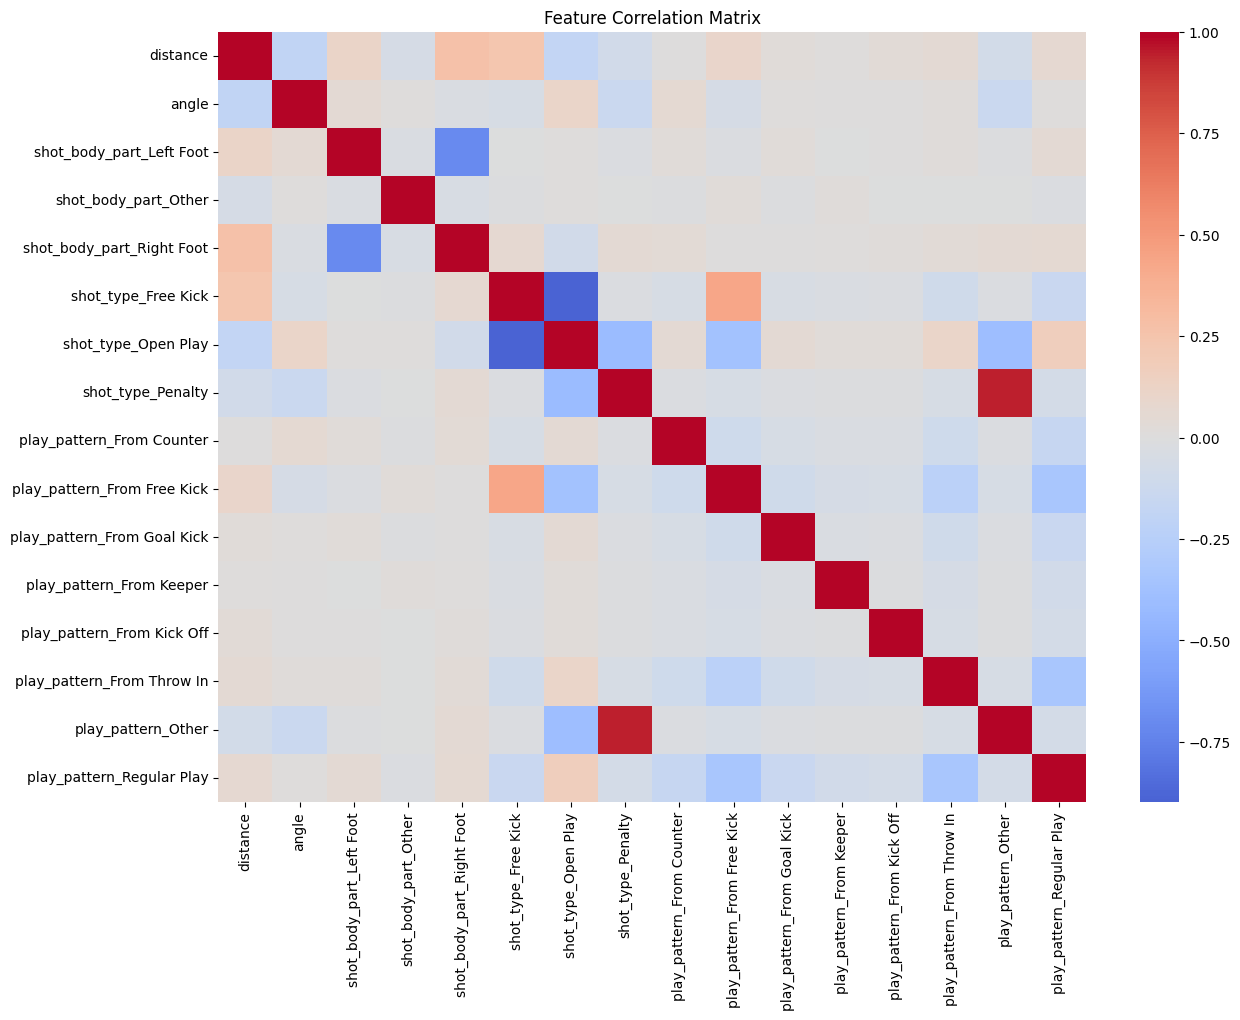

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X_encoded.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [78]:
# Display highly correlated feature pairs
top_corrs = corr_matrix.abs().unstack()
top_corrs = top_corrs[top_corrs < 1].sort_values(ascending=False)
top_corrs.head(20)

play_pattern_Other           shot_type_Penalty              0.944011
shot_type_Penalty            play_pattern_Other             0.944011
shot_type_Free Kick          shot_type_Open Play            0.897506
shot_type_Open Play          shot_type_Free Kick            0.897506
shot_body_part_Left Foot     shot_body_part_Right Foot      0.702074
shot_body_part_Right Foot    shot_body_part_Left Foot       0.702074
shot_type_Free Kick          play_pattern_From Free Kick    0.431496
play_pattern_From Free Kick  shot_type_Free Kick            0.431496
shot_type_Penalty            shot_type_Open Play            0.420744
shot_type_Open Play          shot_type_Penalty              0.420744
play_pattern_Other           shot_type_Open Play            0.395116
shot_type_Open Play          play_pattern_Other             0.395116
                             play_pattern_From Free Kick    0.370729
play_pattern_From Free Kick  shot_type_Open Play            0.370729
play_pattern_From Throw In   play_

In [79]:
# Check that the column is present before dropping
if 'play_pattern_Other' in X_final.columns:
    X_final = X_final.drop(columns=['play_pattern_Other'])

In [80]:
# List all feature (column) names as a Python list
print(list(X_final.columns))

['distance', 'angle', 'shot_body_part_Left Foot', 'shot_body_part_Other', 'shot_body_part_Right Foot', 'shot_type_Free Kick', 'shot_type_Open Play', 'shot_type_Penalty', 'play_pattern_From Counter', 'play_pattern_From Free Kick', 'play_pattern_From Goal Kick', 'play_pattern_From Keeper', 'play_pattern_From Kick Off', 'play_pattern_From Throw In', 'play_pattern_Regular Play', 'distance', 'angle', 'shot_body_part_Left Foot', 'shot_body_part_Other', 'shot_body_part_Right Foot', 'shot_type_Free Kick', 'shot_type_Open Play', 'shot_type_Penalty', 'play_pattern_From Counter', 'play_pattern_From Free Kick', 'play_pattern_From Goal Kick', 'play_pattern_From Keeper', 'play_pattern_From Kick Off', 'play_pattern_From Throw In', 'play_pattern_Regular Play']


In [81]:
# Remove duplicate columns from X_final
X_final = X_final.loc[:,~X_final.columns.duplicated()]
print(list(X_final.columns))  # Verify only unique features are present

['distance', 'angle', 'shot_body_part_Left Foot', 'shot_body_part_Other', 'shot_body_part_Right Foot', 'shot_type_Free Kick', 'shot_type_Open Play', 'shot_type_Penalty', 'play_pattern_From Counter', 'play_pattern_From Free Kick', 'play_pattern_From Goal Kick', 'play_pattern_From Keeper', 'play_pattern_From Kick Off', 'play_pattern_From Throw In', 'play_pattern_Regular Play']


In [ ]:
X_final['']